# Predicción Diabetes

A partir de un conjunto de datos procedente del National Institute of Diabetes and Digestive and Kidney Diaseases, voy a predecir si un paciente tiene o no diabetes.

Todos los pacientes son mujeres de al menos 21 años y de ascendencia india.

Variables del conjunto de datos:
- Pregnancies: Número de embarazos
- Glucose: Niveles de glucosa en sangre en prueba tolerancia a la glucosa (mg/dL).
      - Niveles Normales: <140 mg/dL
      - Prediabetes: 140-199 mg/dL
      - Diabetes: >200 mg/dL
- BloodPressure: Presión diastólica (mmHg)
      - Presión Diastólica Normal: <80 mmHg
      - Hipotensión: <60 mmHg
      - Hipertensión estadio 1: 80-90 mmHg
      - Hipertensión estadio 2: >90 mmHg
- SkinThickness: Grosor del pliegue cutáneo del tríceps (mm)
- Insulin: Niveles de insulina prueba tolerancia a la glucosa (U/ml)
      - Normal: < 30 U/ml
      - Resistencia a la insulina: >30 U/ml
- BMI: Índice de masa corporal (kg/m^2)
      - Peso insuficiente: <18.5 
      - Peso saludable: 18.5-24.9
      - Sobrepeso: 25.0- 29.9
      - Obsesidad: > 30.0
- DiabetesPedigreeFunction: Probabilidad de diabetes según los antecedentes familiares
- Age: Edad (años)
- Outcome: No diabetes: 0; Diabetes: 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('diabetes.csv')

# Análisis Exploratorio de Datos

In [3]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
train.shape

(768, 9)

El conjunto de datos está compuesto por 768 observaciones y 9 características.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Si observamos la tabla anterior, encontramos algunos datos que no tienen mucho sentido. Encontramos valores mínimos de 0 para la glucosa, la presión arterial, el pliegue cutáneo, la insulina y el BMI. Lo más probable es que sean datos perdidos, por lo que vamos a cambiarlos por NaN para que sea más fácil reemplazarlos. Además, vamos a calcular la correlación entre las distintas variables por si fuese útil una de ellas para reemplazar los valores perdidos de otra.

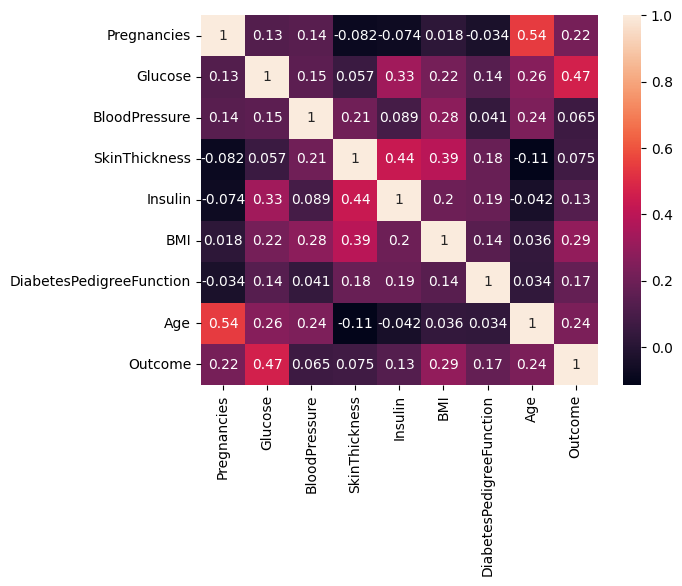

In [7]:
sns.heatmap(train.corr(numeric_only=True), annot=True)
plt.show()

In [8]:
train_df=train.copy()
train_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]=train[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
train_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
train_df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

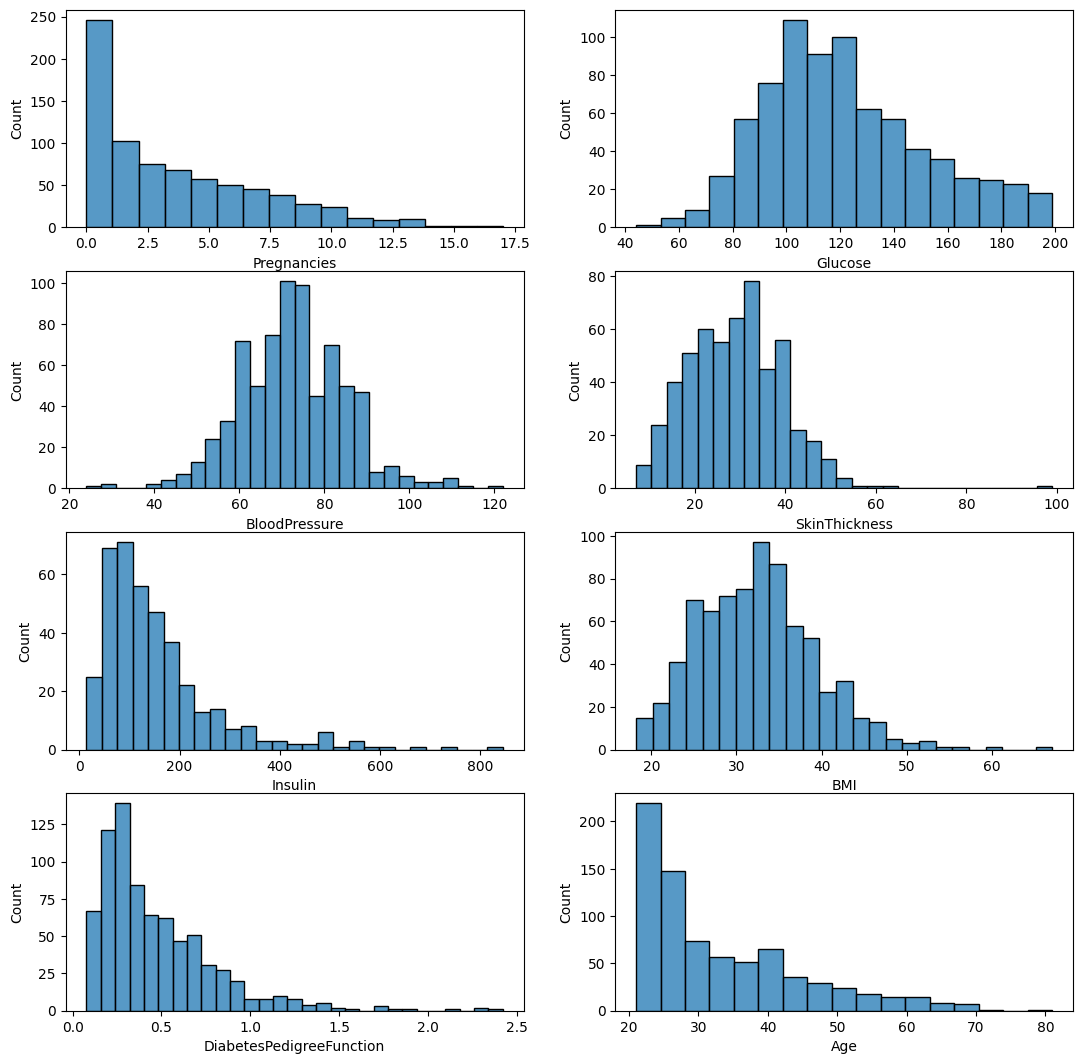

In [10]:
fig, ax= plt.subplots(4,2, figsize=(13,13))
ax=ax.flatten()
sns.histplot(train_df['Pregnancies'], ax=ax[0])
sns.histplot(train_df['Glucose'], ax=ax[1])
sns.histplot(train_df['BloodPressure'], ax=ax[2])
sns.histplot(train_df['SkinThickness'], ax=ax[3])
sns.histplot(train_df['Insulin'], ax=ax[4])
sns.histplot(train_df['BMI'], ax=ax[5])
sns.histplot(train_df['DiabetesPedigreeFunction'], ax=ax[6])
sns.histplot(train_df['Age'], ax=ax[7])
plt.show()

En los gráficos de arriba podemos observar que excepto la glucosa y la presión sanguínea, todas las demás características tienen una distribución asimétrica. Entonces, para reemplazar los valores perdidos de la glucosa y la presión sanguínea para cada grupo de clasificación ('Outcome') vamos a utilizar la media, para la insulina y el BMI vamos a utilizar la mediana y para el pliegue cutáneo vamos a crear un nueva variable que va a estar formada por el BMI dividido en 4 categorías (Peso insuficiente: 1; peso saludable: 2; sobrepeso: 25.0- 3; obsesidad: 4) y vamos a usar la mediana para cada grupo de clasificación. Esta variable la voy a crear porque en análisis realizados previamente aparecían muchos outliers, y al crear esta variable esos outliers desaparecían y el algoritmo era mucho más preciso.

In [11]:
train_df.groupby('Outcome')['Glucose'].mean()

Outcome
0    110.643863
1    142.319549
Name: Glucose, dtype: float64

In [12]:
train_df.groupby('Outcome')['BloodPressure'].mean()

Outcome
0    70.877339
1    75.321429
Name: BloodPressure, dtype: float64

In [13]:
train_df.groupby('Outcome')['Insulin'].median()

Outcome
0    102.5
1    169.5
Name: Insulin, dtype: float64

In [14]:
train_df.groupby('Outcome')['BMI'].median()

Outcome
0    30.1
1    34.3
Name: BMI, dtype: float64

In [15]:
train_df['Glucose'].fillna(train_df.groupby('Outcome')['Glucose'].transform('mean'), inplace=True)
train_df['BloodPressure'].fillna(train_df.groupby('Outcome')['BloodPressure'].transform('mean'), inplace=True)
train_df['Insulin'].fillna(train_df.groupby('Outcome')['Insulin'].transform('median'), inplace=True)
train_df['BMI'].fillna(train_df.groupby('Outcome')['BMI'].transform('median'), inplace=True)

In [16]:
def bmi_cat(val):
    if val<18.5:
        return 1
    elif val>=18.5 and val<=24.9:
        return 2
    elif val>=25.0 and val<=29.9:
        return 3
    else:
        return 4

In [17]:
val= lambda x: list(map(bmi_cat, x))

In [18]:
train_df['BMI_cat']=val(train_df['BMI'])

In [19]:
train_df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
BMI_cat                       0
dtype: int64

In [20]:
train_df.groupby(['Outcome','BMI_cat'])['SkinThickness'].mean()

Outcome  BMI_cat
0        1          17.000000
         2          17.689655
         3          22.830000
         4          32.283582
1        2          15.000000
         3          24.666667
         4          34.728477
Name: SkinThickness, dtype: float64

In [21]:
train_df['SkinThickness'].fillna(train_df.groupby(['Outcome', 'BMI_cat'])['SkinThickness'].transform('mean'), inplace=True)

In [22]:
train_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
BMI_cat                     0
dtype: int64

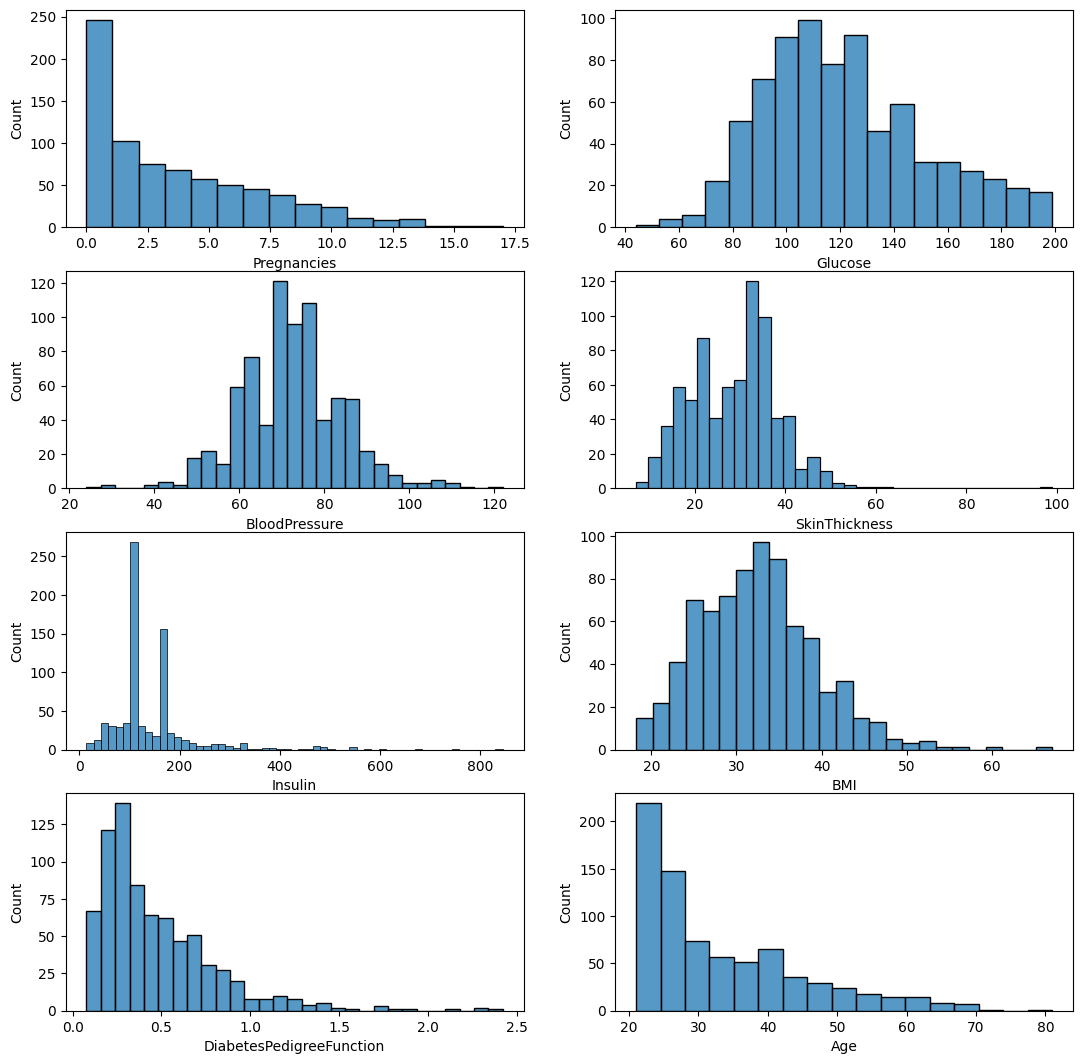

In [23]:
fig, ax= plt.subplots(4,2, figsize=(13,13))
ax=ax.flatten()
sns.histplot(train_df['Pregnancies'], ax=ax[0])
sns.histplot(train_df['Glucose'], ax=ax[1])
sns.histplot(train_df['BloodPressure'], ax=ax[2])
sns.histplot(train_df['SkinThickness'], ax=ax[3])
sns.histplot(train_df['Insulin'], ax=ax[4])
sns.histplot(train_df['BMI'], ax=ax[5])
sns.histplot(train_df['DiabetesPedigreeFunction'], ax=ax[6])
sns.histplot(train_df['Age'], ax=ax[7])
plt.show()

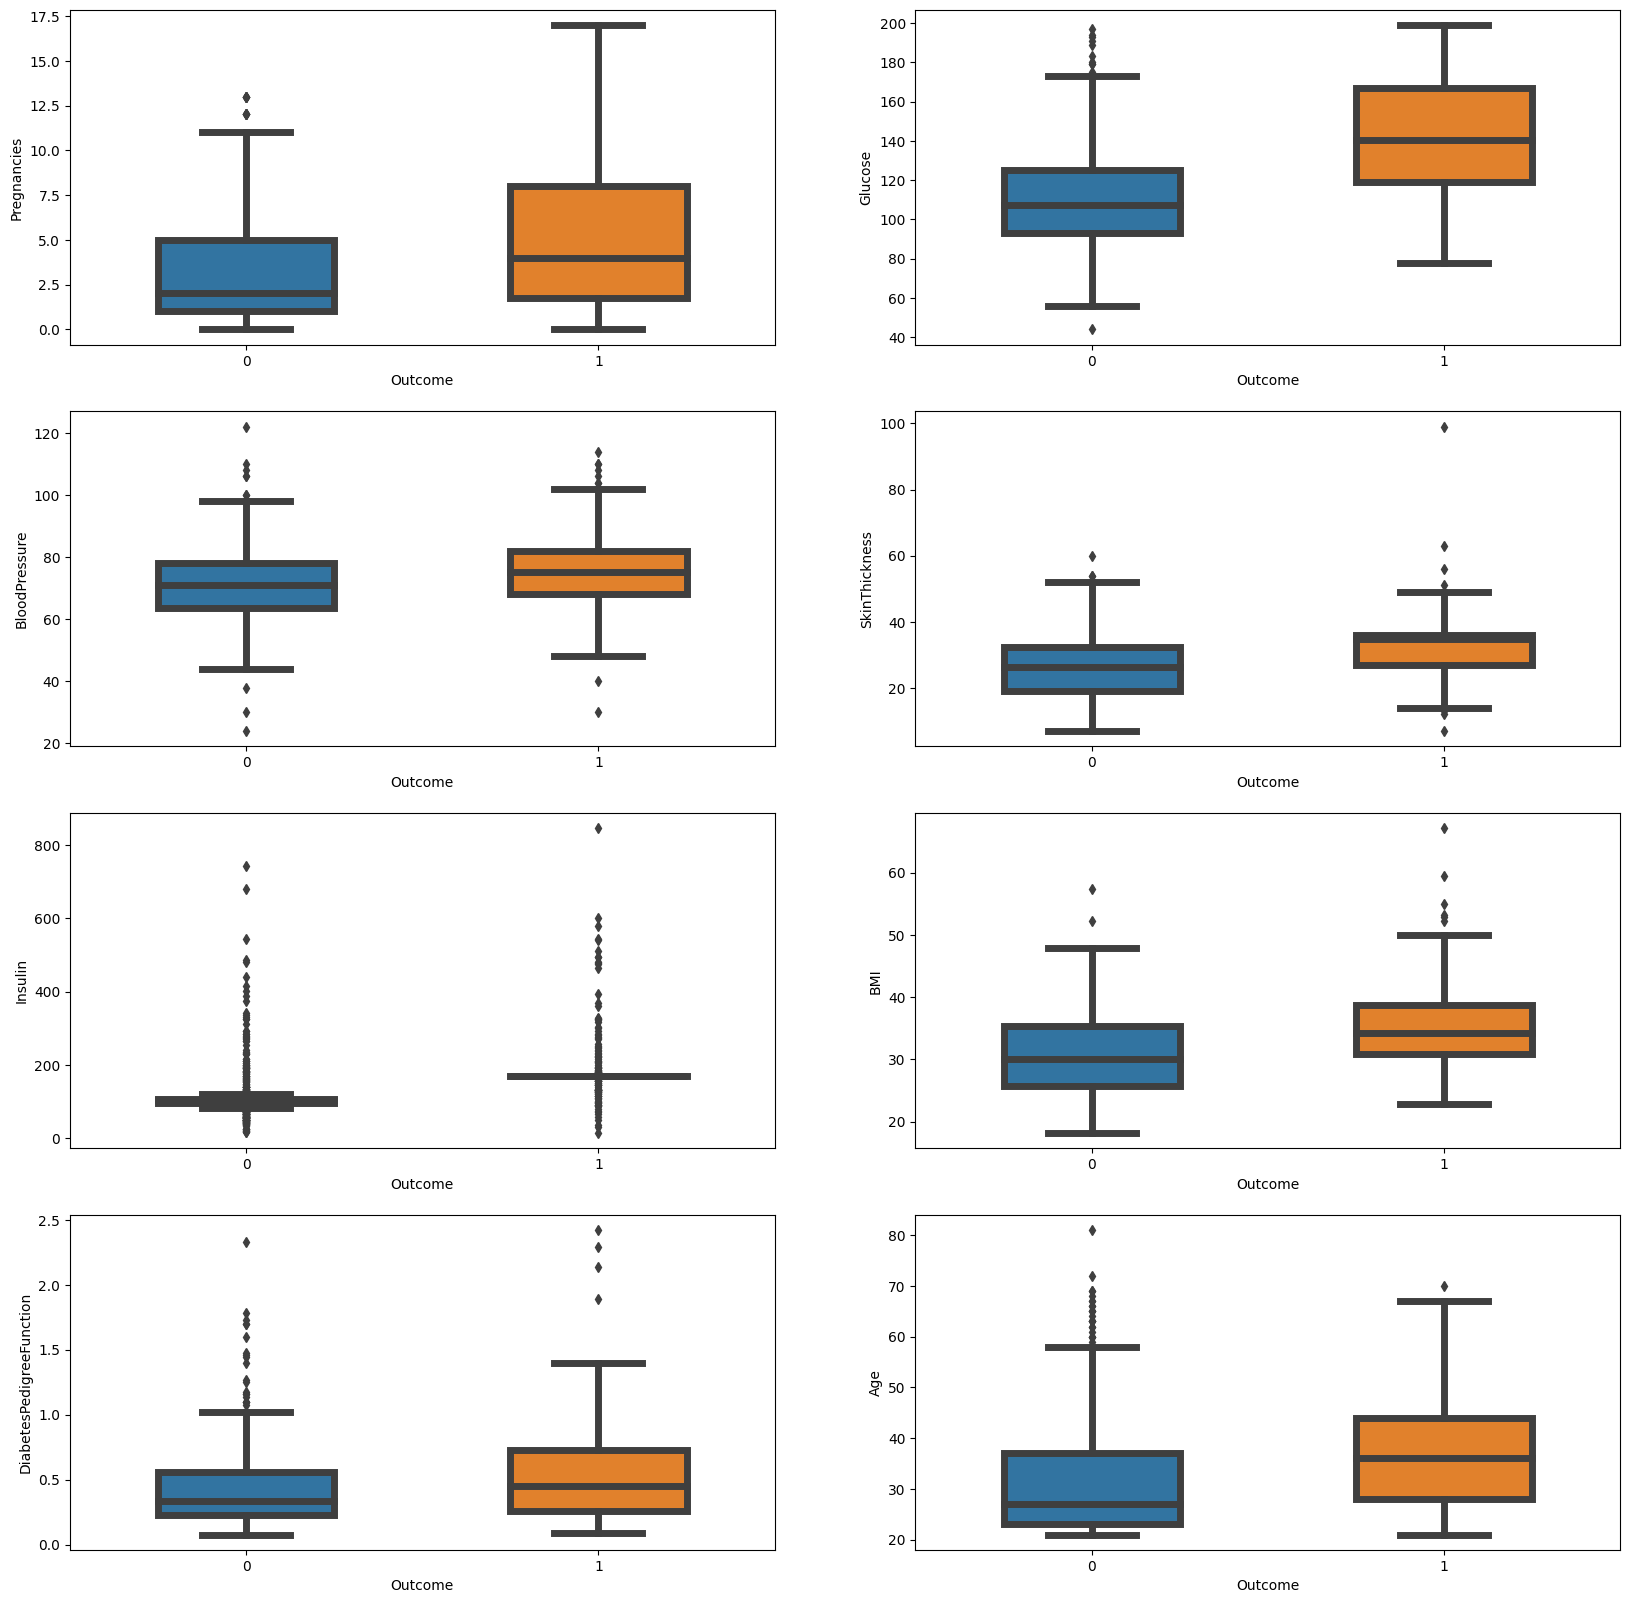

In [24]:
fig, ax= plt.subplots(4,2, figsize=(20,20))
ax=ax.flatten()
sns.boxplot(data=train_df, x='Outcome', y='Pregnancies', linewidth=5, width=0.5, ax=ax[0])
sns.boxplot(data=train_df, x='Outcome', y='Glucose', linewidth=5, width=0.5, ax=ax[1])
sns.boxplot(data=train_df, x='Outcome', y='BloodPressure', linewidth=5, width=0.5, ax=ax[2])
sns.boxplot(data=train_df, x='Outcome', y='SkinThickness', linewidth=5, width=0.5, ax=ax[3])
sns.boxplot(data=train_df, x='Outcome', y='Insulin', linewidth=5, width=0.5, ax=ax[4])
sns.boxplot(data=train_df, x='Outcome', y='BMI', linewidth=5, width=0.5, ax=ax[5])
sns.boxplot(data=train_df, x='Outcome', y='DiabetesPedigreeFunction', linewidth=5, width=0.5, ax=ax[6])
sns.boxplot(data=train_df, x='Outcome', y='Age', linewidth=5, width=0.5, ax=ax[7])
plt.show()

In [25]:
train_df=train_df.drop('BMI_cat', axis=1)

Si observamos las gráficas de arriba parece haber outliers en todas las características para cada grupo de clasificación. Para comprobarlo voy utilizar el método del Rango Intercuartílico (IQR).

In [26]:
def outliers(df):
    
    def Q1(df):
        Q1 = df.quantile(0.25)
        return Q1
    
    def Q3(df):
        Q3 = df.quantile(0.75)
        return Q3
    
    def IQR(df):
        IQR = Q3(df) - Q1(df)
        return IQR
    
    def Lower(df):
        Lower = Q1(df) - 1.5*IQR(df)
        return Lower
    
    def Upper(df):
        Upper = Q3(df) + 1.5*IQR(df)
        return Upper
    
    Q1(df)
    Q3(df)
    IQR(df)
    Lower(df)
    Upper(df)
    
    outliers = df[(df<=Lower(df)) | (df>=Upper(df))]
    return outliers

In [27]:
def no_outliers(df):
    
    def Q1(df):
        Q1 = df.quantile(0.25)
        return Q1
    
    def Q3(df):
        Q3 = df.quantile(0.75)
        return Q3
    
    def IQR(df):
        IQR = Q3(df) - Q1(df)
        return IQR
    
    def Lower(df):
        Lower = Q1(df) - 1.5*IQR(df)
        return Lower
    
    def Upper(df):
        Upper = Q3(df) + 1.5*IQR(df)
        return Upper
    
    Q1(df)
    Q3(df)
    IQR(df)
    Lower(df)
    Upper(df)
    
    no_outliers = df[(df>Lower(df)) & (df<Upper(df))]
    return no_outliers

In [28]:
outliers(train_df['Pregnancies'])

88     15
159    17
298    14
455    14
Name: Pregnancies, dtype: int64

In [29]:
outliers(train_df['Glucose'])

Series([], Name: Glucose, dtype: float64)

In [30]:
outliers(train_df['BloodPressure'])

4       40.0
18      30.0
43     110.0
84     108.0
106    122.0
125     30.0
177    110.0
207    104.0
362    108.0
440    104.0
549    110.0
597     24.0
599     38.0
658    106.0
662    106.0
672    106.0
691    114.0
Name: BloodPressure, dtype: float64

In [31]:
outliers(train_df['SkinThickness'])

57     60.0
86     54.0
120    56.0
211    54.0
445    63.0
579    99.0
Name: SkinThickness, dtype: float64

In [32]:
outliers(train_df['Insulin'])

8      543.0
13     846.0
53     300.0
54     342.0
56     304.0
73     270.0
111    495.0
139    325.0
144    284.0
153    485.0
162    285.0
186    495.0
199    318.0
206    280.0
215    271.0
220    478.0
228    744.0
231    370.0
247    680.0
248    402.0
258    375.0
279    278.0
286    545.0
296    360.0
360    325.0
364    293.0
370    465.0
375    325.0
388    285.0
392    415.0
395    275.0
409    579.0
412    310.0
415    474.0
425    277.0
480    328.0
486    480.0
519    326.0
561    274.0
574    330.0
584    600.0
606    293.0
608    272.0
612    321.0
645    440.0
655    540.0
695    480.0
707    335.0
710    387.0
713    291.0
715    392.0
753    510.0
Name: Insulin, dtype: float64

In [33]:
outliers(train_df['BMI'])

120    53.2
125    55.0
177    67.1
193    52.3
247    52.3
303    52.9
445    59.4
673    57.3
Name: BMI, dtype: float64

In [34]:
outliers(train_df['DiabetesPedigreeFunction'])

4      2.288
12     1.441
39     1.390
45     1.893
58     1.781
100    1.222
147    1.400
187    1.321
218    1.224
228    2.329
243    1.318
245    1.213
259    1.353
292    1.224
308    1.391
330    1.476
370    2.137
371    1.731
383    1.268
395    1.600
445    2.420
534    1.251
593    1.699
606    1.258
618    1.282
621    1.698
622    1.461
659    1.292
661    1.394
Name: DiabetesPedigreeFunction, dtype: float64

In [35]:
outliers(train_df['Age'])

123    69
363    67
453    72
459    81
489    67
537    67
666    70
674    68
684    69
Name: Age, dtype: int64

Mediante este método hemos podido comprobar que hay muchos outliers tal y como se veía en los boxplot. Como hay muchos, no podemos eliminarlos ya que nos quedaríamos con muy pocos datos. Por tanto, vamos a convertirlos en NaN y reemplazarlos con la mediana de cada variable para cada grupo de clasificación .

In [36]:
train_final = no_outliers(train_df)

In [37]:
train_final

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,169.5,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.000000,102.5,26.6,0.351,31.0,0
2,8.0,183.0,64.0,15.000000,169.5,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.000000,94.0,28.1,0.167,21.0,0
4,0.0,137.0,NaN,35.000000,168.0,43.1,NaN,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.000000,102.5,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.000000,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,34.728477,169.5,30.1,0.349,47.0,1


In [38]:
train_final.isnull().sum()

Pregnancies                  4
Glucose                      0
BloodPressure               17
SkinThickness                6
Insulin                     52
BMI                          8
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64

In [39]:
train_final.groupby('Outcome')['Pregnancies'].median()

Outcome
0    2.0
1    4.0
Name: Pregnancies, dtype: float64

In [40]:
train_final.groupby('Outcome')['BloodPressure'].median()

Outcome
0    70.877339
1    75.321429
Name: BloodPressure, dtype: float64

In [41]:
train_final.groupby('Outcome')['Insulin'].median()

Outcome
0    102.5
1    169.5
Name: Insulin, dtype: float64

In [42]:
train_final.groupby('Outcome')['BMI'].median()

Outcome
0    30.1
1    34.2
Name: BMI, dtype: float64

In [43]:
train_final.groupby('Outcome')['DiabetesPedigreeFunction'].median()

Outcome
0    0.325
1    0.422
Name: DiabetesPedigreeFunction, dtype: float64

In [44]:
train_final.groupby('Outcome')['Age'].median()

Outcome
0    26.0
1    36.0
Name: Age, dtype: float64

In [45]:
train_final['Pregnancies'].fillna(train_final.groupby('Outcome')['Pregnancies'].transform('median'), inplace=True)
train_final['BloodPressure'].fillna(train_final.groupby('Outcome')['BloodPressure'].transform('median'), inplace=True)
train_final['Insulin'].fillna(train_final.groupby('Outcome')['Insulin'].transform('median'), inplace=True)
train_final['BMI'].fillna(train_final.groupby('Outcome')['BMI'].transform('median'), inplace=True)
train_final['DiabetesPedigreeFunction'].fillna(train_df.groupby('Outcome')['DiabetesPedigreeFunction'].transform('median'), inplace=True)
train_final['Age'].fillna(train_final.groupby('Outcome')['Age'].transform('median'), inplace=True)

In [46]:
train_final.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               6
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [47]:
train_final['BMI_cat']=val(train_final['BMI'])

In [48]:
train_final.groupby(['Outcome', 'BMI_cat'])['SkinThickness'].median()

Outcome  BMI_cat
0        1          17.000000
         2          17.689655
         3          22.830000
         4          32.283582
1        2          15.000000
         3          24.666667
         4          34.728477
Name: SkinThickness, dtype: float64

In [49]:
train_final['SkinThickness'].fillna(train_final.groupby(['Outcome', 'BMI_cat'])['SkinThickness'].transform('median'), inplace=True)

In [50]:
train_final.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
BMI_cat                     0
dtype: int64

In [51]:
train_final=train_final.drop('BMI_cat', axis=1)

In [52]:
outliers= no_outliers(train_final)

In [53]:
outliers.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          3
DiabetesPedigreeFunction    15
Age                          8
Outcome                      0
dtype: int64

Tras realizar los cambios necesarios para reemplazar los outliers hemos vuelto a comprobar si había outliers. Arriba podemos observar que hemos corregido muchos outliers pero siguen quedando algunos. En los diagramas de cajas de abajo corroboramos estos datos.

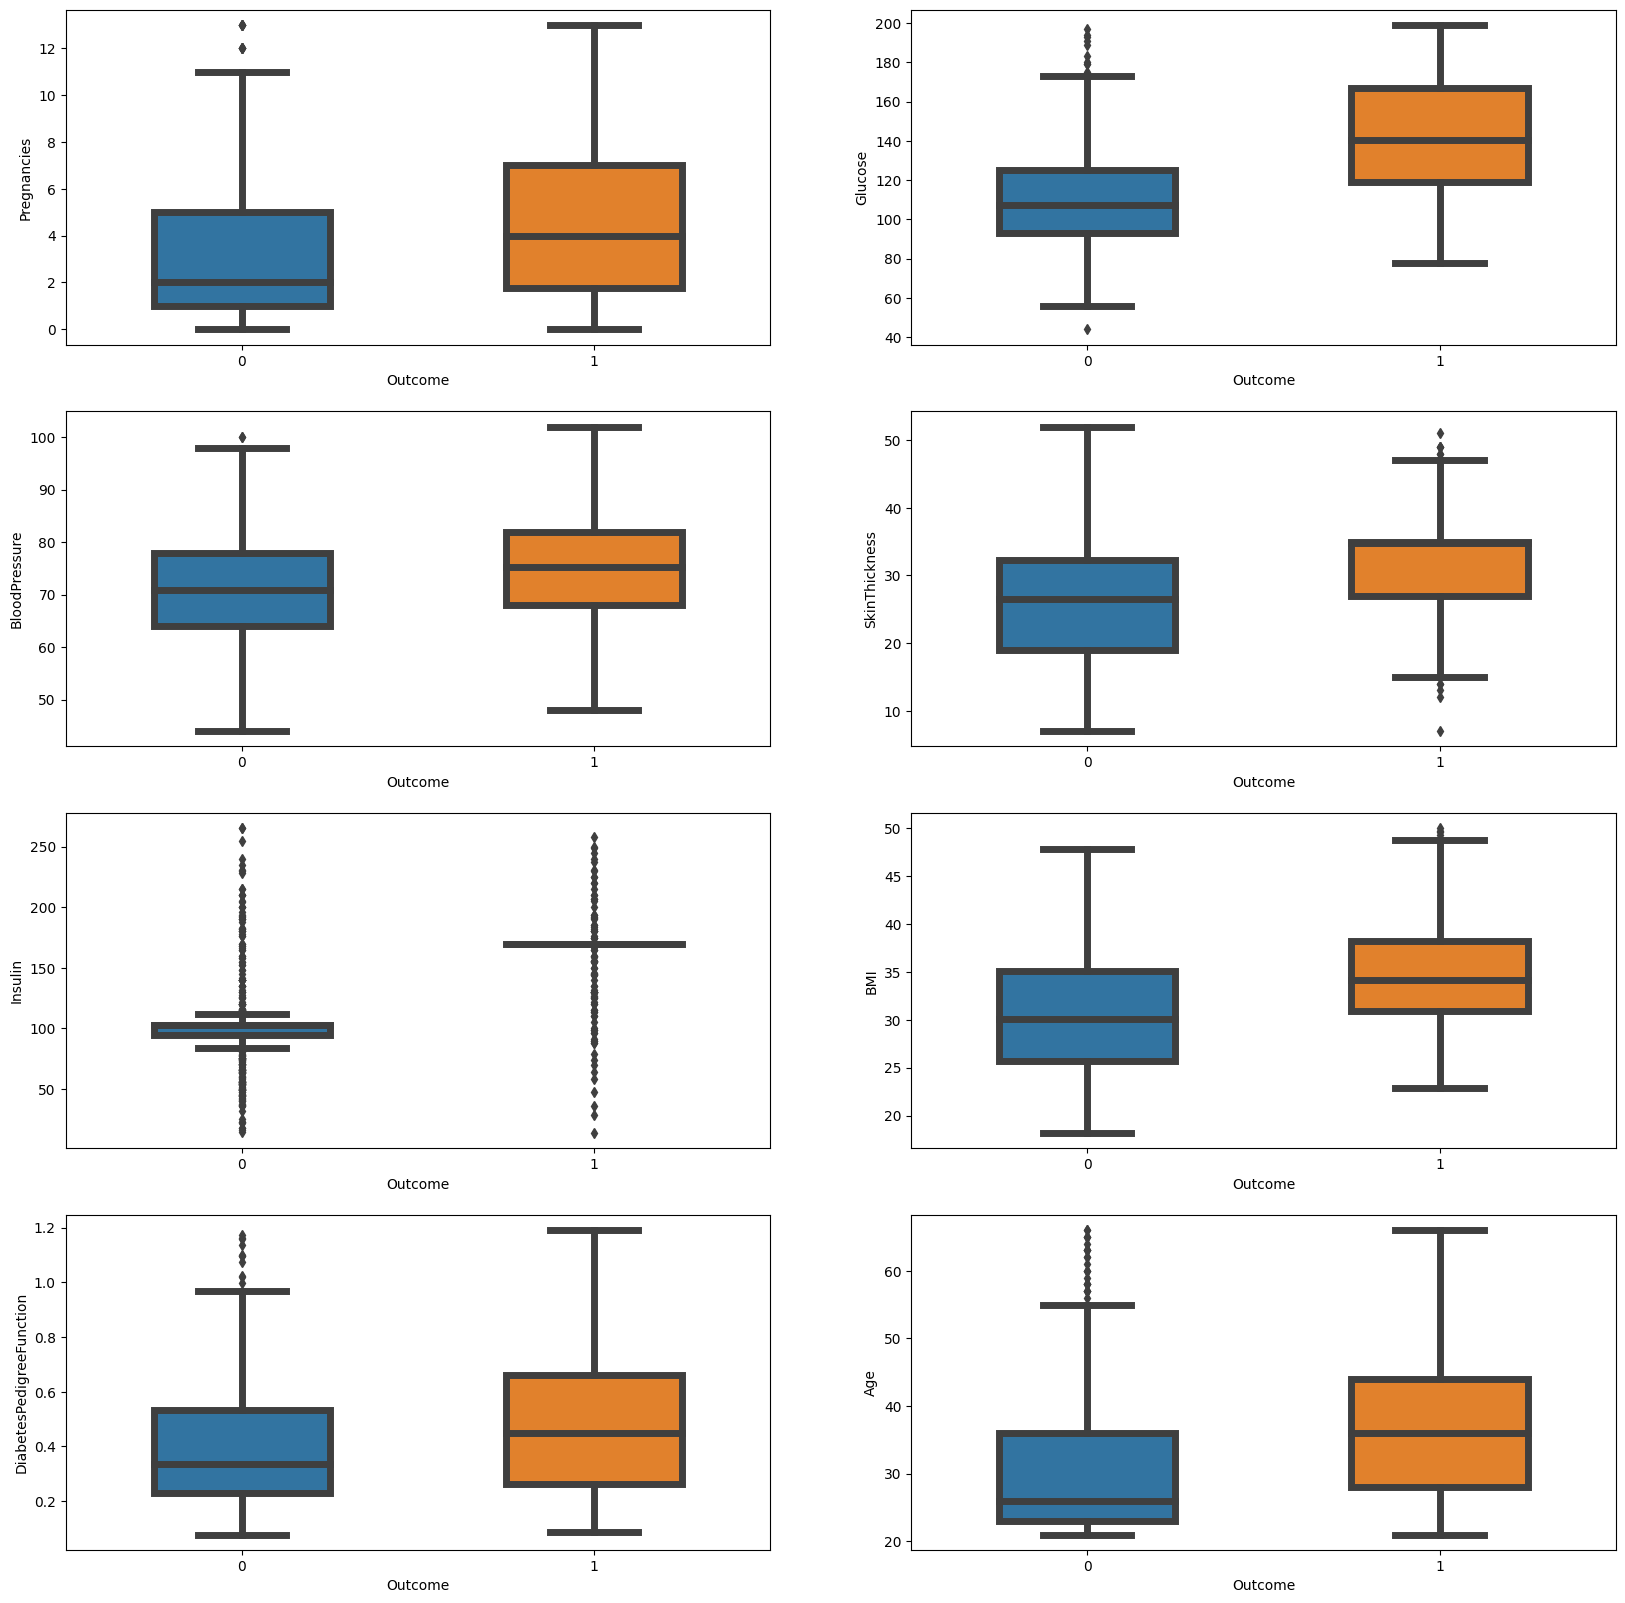

In [54]:
fig, ax= plt.subplots(4,2, figsize=(20,20))
ax=ax.flatten()
sns.boxplot(data=train_final, x='Outcome', y='Pregnancies', linewidth=5, width=0.5, ax=ax[0])
sns.boxplot(data=train_final, x='Outcome', y='Glucose', linewidth=5, width=0.5, ax=ax[1])
sns.boxplot(data=train_final, x='Outcome', y='BloodPressure', linewidth=5, width=0.5, ax=ax[2])
sns.boxplot(data=train_final, x='Outcome', y='SkinThickness', linewidth=5, width=0.5, ax=ax[3])
sns.boxplot(data=train_final, x='Outcome', y='Insulin', linewidth=5, width=0.5, ax=ax[4])
sns.boxplot(data=train_final, x='Outcome', y='BMI', linewidth=5, width=0.5, ax=ax[5])
sns.boxplot(data=train_final, x='Outcome', y='DiabetesPedigreeFunction', linewidth=5, width=0.5, ax=ax[6])
sns.boxplot(data=train_final, x='Outcome', y='Age', linewidth=5, width=0.5, ax=ax[7])
plt.show()

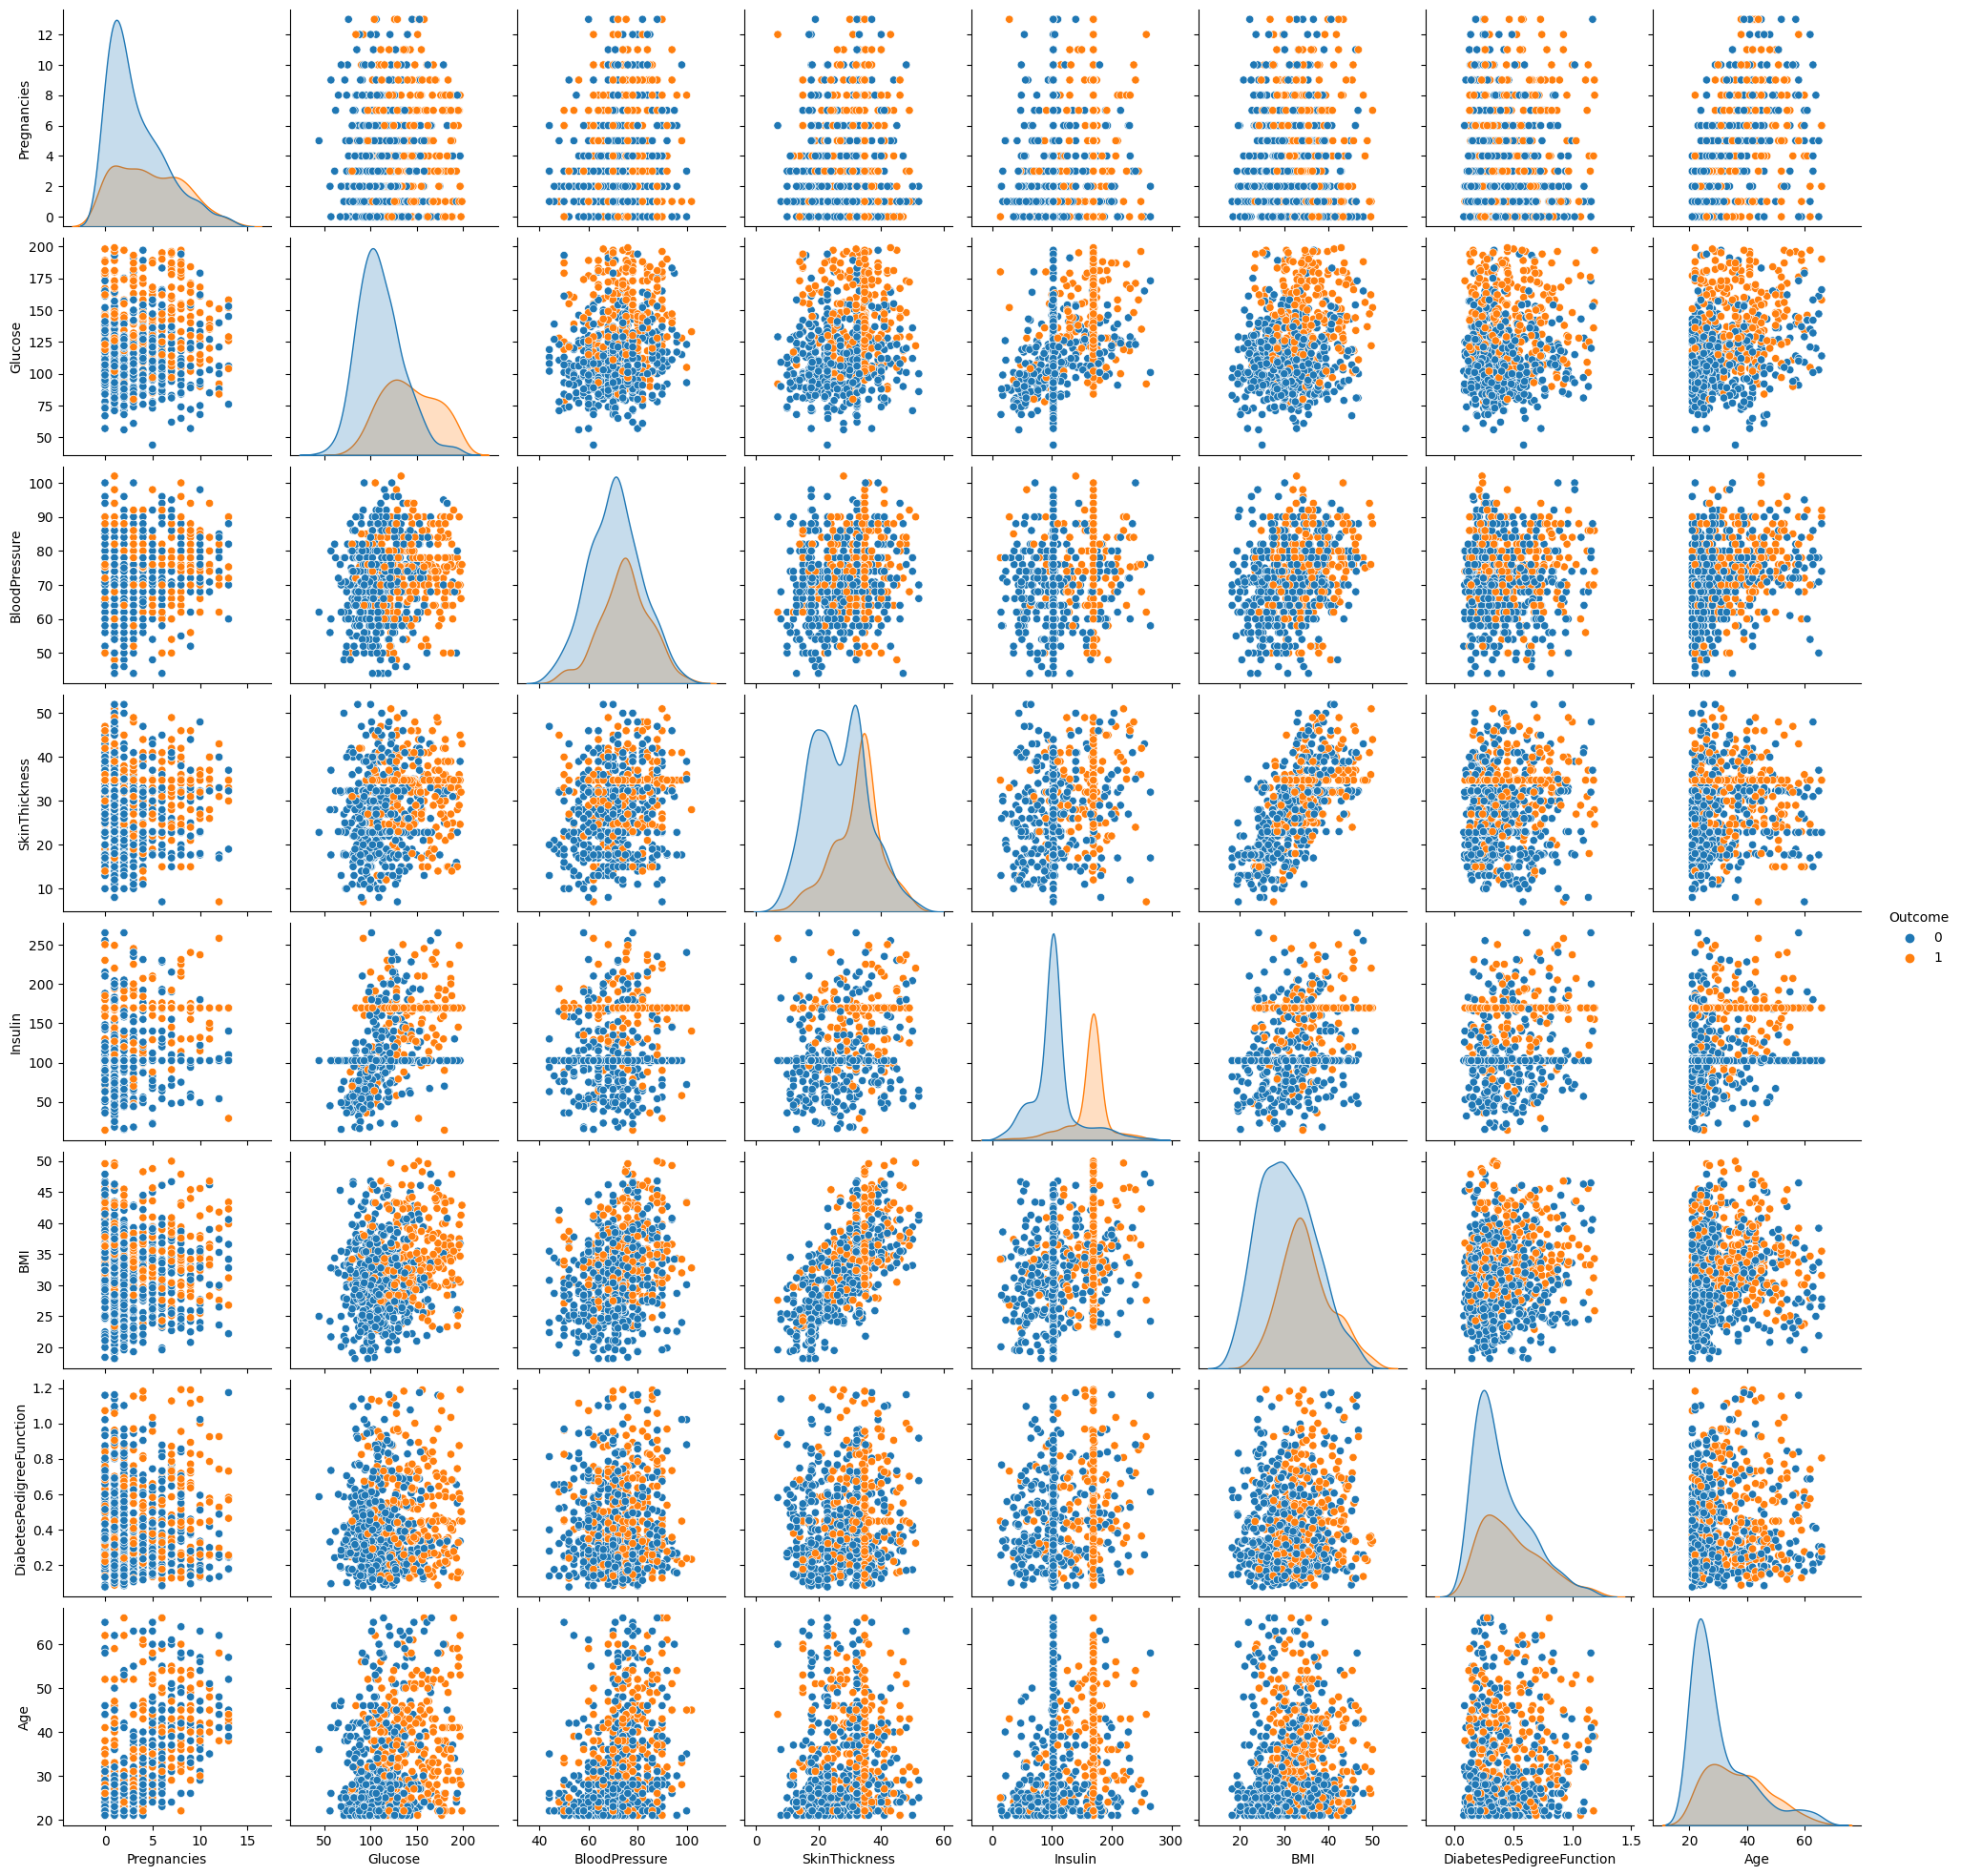

In [55]:
sns.pairplot(data=train_final, 
             hue='Outcome')
plt.show()

Si observamos el gráfico superior podemos apreciar 2 grupos más o menos separados para cada variable y grupo de clasificación.

In [56]:
train_final.corr(numeric_only=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120591,0.191339,0.107708,0.157067,0.031831,0.003728,0.560730,0.204697
Glucose,0.120591,1.000000,0.209821,0.194183,0.485726,0.233851,0.087902,0.276938,0.495954
BloodPressure,0.191339,0.209821,1.000000,0.226387,0.140380,0.277989,0.040523,0.313822,0.180206
SkinThickness,0.107708,0.194183,0.226387,1.000000,0.289480,0.686692,0.080142,0.108334,0.303217
Insulin,0.157067,0.485726,0.140380,0.289480,1.000000,0.309733,0.170251,0.251607,0.608584
BMI,0.031831,0.233851,0.277989,0.686692,0.309733,1.000000,0.128144,0.083855,0.308273
DiabetesPedigreeFunction,0.003728,0.087902,0.040523,0.080142,0.170251,0.128144,1.000000,0.034635,0.163104
Age,0.560730,0.276938,0.313822,0.108334,0.251607,0.083855,0.034635,1.000000,0.269616
Outcome,0.204697,0.495954,0.180206,0.303217,0.608584,0.308273,0.163104,0.269616,1.000000


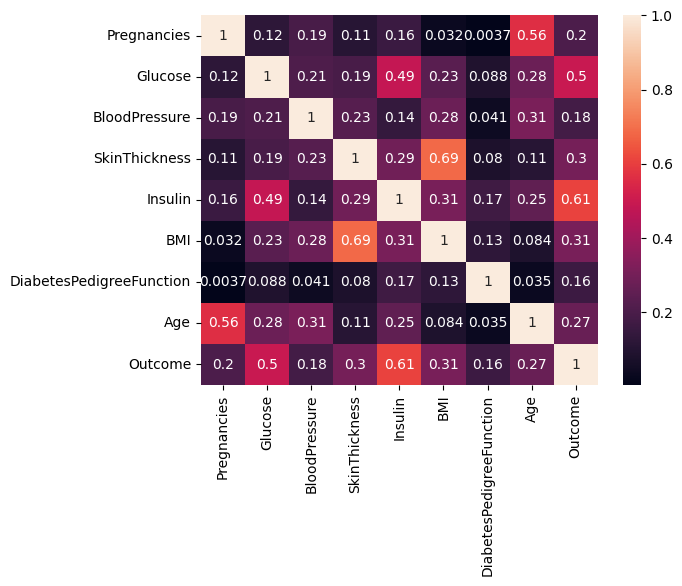

In [57]:
sns.heatmap(train_final.corr(numeric_only=True), annot=True)
plt.show()

En la matriz de correlación superior observamos:
- El nº de embarazos tiene un índice de correlación de 0.56 con la edad.
- La glucosa tiene un índice de correlación de 0.49 con la insulina y de 0.5 con el desarrollo o no de diabetes.
- El pliegue cutáneo tiene un índice de correlación de 0.69 con el BMI.
- La insulina tiene un índice de correlación de 0.61 con el desarrollo o no de diabetes.

In [58]:
def glucose_cat(g):
    if g<140.0:
        return 'Normal'
    elif g>=140.0 and g<=199.0:
        return 'Prediabetes'
    else:
        return 'Diabetes'

In [59]:
g= lambda x: list(map(glucose_cat, x))

In [60]:
train_final['Glucose_cat']=g(train_final['Glucose'])

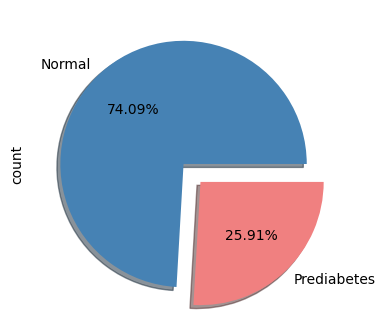

In [61]:
plot=train_final['Glucose_cat'].value_counts().plot(kind='pie', 
                                                    figsize=(4,4), 
                                                    autopct='%1.2f%%',
                                                   colors=['SteelBlue', 'LightCoral'],
                                                   shadow=True,
                                                   explode =(0, 0.2))

El 25.91% de las pacientes tienen unos niveles que indican prediabetes.

In [62]:
def bloodpressure_cat(b):
    if b<=60:
        return 'Hypotension'
    elif b<=80:
        return 'Normal'
    elif b>80 and b<=90:
        return 'Hypertension Stage 1'
    else:
        return 'Hypertension Stage 2'

In [63]:
b= lambda x: list(map(bloodpressure_cat, x))

In [64]:
train_final['BloodPressure_cat'] = b(train_final['BloodPressure'])

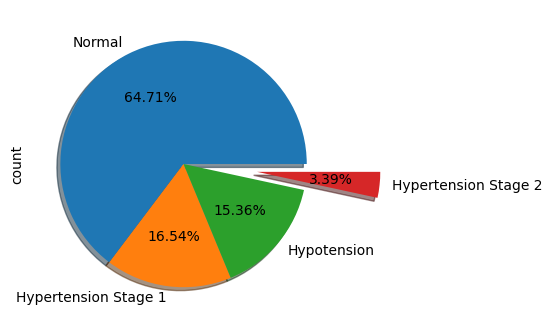

In [65]:
plot=train_final['BloodPressure_cat'].value_counts().plot(kind='pie', 
                                                    figsize=(4,4), 
                                                    autopct='%1.2f%%',
                                                    shadow=True,
                                                    explode =(0, 0, 0, 0.6))

El 3.39% de las pacientes tienen hipertensión en estadio 2 y el 16.54% en estadio 1.

In [66]:
def insulin_cat(i):
    if i<=30:
        return 'Normal'
    else:
        return 'Insulin Resistance'

In [67]:
i= lambda x: list(map(insulin_cat, x))

In [68]:
train_final['Insulin_cat'] = i(train_final['Insulin'])

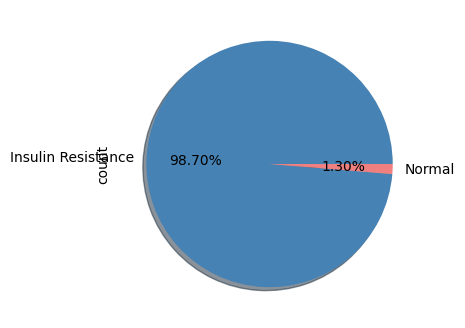

In [69]:
plot=train_final['Insulin_cat'].value_counts().plot(kind='pie', 
                                                    figsize=(4,4), 
                                                    autopct='%1.2f%%',
                                                   colors=['SteelBlue', 'LightCoral'],
                                                   shadow=True)

El 98.70% de las pacientes presenta resistencia a la insulina.

In [70]:
train_final['BMI_cat']=val(train_final['BMI'])

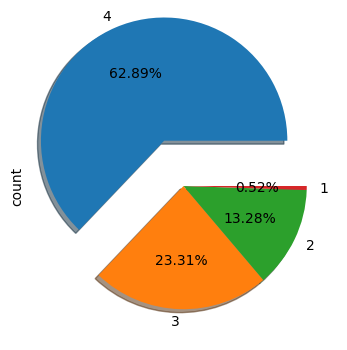

In [71]:
plot=train_final['BMI_cat'].value_counts().plot(kind='pie', 
                                                    figsize=(4,4), 
                                                    autopct='%1.2f%%',
                                                   shadow=True,
                                                explode =(0.4, 0, 0, 0))

El 62.89% de las pacientes son obesas.

In [72]:
train_final=train_final.drop(['BMI_cat', 'Insulin_cat', 'BloodPressure_cat', 'Glucose_cat'], axis=1)

In [73]:
train_final.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Preprocessing

**Escalar datos**

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X=pd.DataFrame(scaler.fit_transform(train_final.drop(['Outcome'], axis=1)), columns= ['Pregnancies', 'Glucose', 'BloodPressure', 
                                                                                      'SkinThickness', 'Insulin', 'BMI', 
                                                                                      'DiabetesPedigreeFunction', 'Age'])

In [75]:
y=train_final['Outcome']

# Model

Ahora vamos a evaluar 3 algoritmos de clasificación: Linear SVC, KNeighbors Classifier y Random Forest Classifier.

Primero, vamos a dividir el conjunto de datos en 80% para entrenar el modelo y en un 20% para evaluarlo.

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [77]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Linear SVC**

In [78]:
kf=KFold(n_splits=5, shuffle=True, random_state=1)
C = np.array([0.001, 0.01, 1, 10, 100])
param_grid={'C': C}
svm = LinearSVC()
svm_cv= GridSearchCV(svm, param_grid, cv=kf)
svm_cv.fit(X_train, y_train)
print('Best score: ' + str(svm_cv.best_score_))
print('Best Parameters: ' + str(svm_cv.best_params_))

Best score: 0.8484339597494337
Best Parameters: {'C': 10.0}


In [79]:
svm = LinearSVC(C=0.01, random_state=2)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print()
print(f"Accuracy on test data by Linear SVC: {accuracy_score(y_test, y_pred_svm)}")
print("Classification report on test data by Linear SVC:")
print(classification_report(y_test, y_pred_svm))


Accuracy on test data by Linear SVC: 0.8636363636363636
Classification report on test data by Linear SVC:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       100
           1       0.81      0.80      0.80        54

    accuracy                           0.86       154
   macro avg       0.85      0.85      0.85       154
weighted avg       0.86      0.86      0.86       154



In [80]:
print(confusion_matrix(y_test, y_pred_svm))

[[90 10]
 [11 43]]


**KNeighbors Classifiers**

In [81]:
kf=KFold(n_splits=5, shuffle=True, random_state=1)
param_grid={'n_neighbors': np.arange(5,30)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn, param_grid, cv=kf)
knn_cv.fit(X_train, y_train)
print('Best score: ' + str(knn_cv.best_score_))
print('Best Parameters: ' + str(knn_cv.best_params_))

Best score: 0.8745435159269626
Best Parameters: {'n_neighbors': 15}


In [82]:
knn = KNeighborsClassifier(n_neighbors = 26)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print()
print(f"Accuracy on test data by KNeighbors Classifier: {accuracy_score(y_test, y_pred_knn)}")
print("Classification report on test data by KNeighbors Classifier:")
print(classification_report(y_test, y_pred_knn))


Accuracy on test data by KNeighbors Classifier: 0.8636363636363636
Classification report on test data by KNeighbors Classifier:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       100
           1       0.82      0.78      0.80        54

    accuracy                           0.86       154
   macro avg       0.85      0.84      0.85       154
weighted avg       0.86      0.86      0.86       154



In [83]:
print(confusion_matrix(y_test, y_pred_knn))

[[91  9]
 [12 42]]


**Random Forest Classifier**

In [84]:
kf=KFold(n_splits=5, shuffle=True, random_state=1)
n_estimators = np.array([10, 100, 125, 150, 175, 200])
param_grid={'n_estimators': n_estimators}
rfc = RandomForestClassifier()
rfc_cv= GridSearchCV(rfc, param_grid, cv=kf)
rfc_cv.fit(X_train, y_train)
print('Best score: ' + str(rfc_cv.best_score_))
print('Best Parameters: ' + str(rfc_cv.best_params_))

Best score: 0.9005997600959617
Best Parameters: {'n_estimators': 150}


In [85]:
rfc = RandomForestClassifier(n_estimators = 175, random_state=2)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print()
print(f"Accuracy on test data by Random Forest Classifier: {accuracy_score(y_test, y_pred_rfc)}")
print(f"Classification report on test data by Random Forest Classifier:")
print(classification_report(y_test, y_pred_rfc))


Accuracy on test data by Random Forest Classifier: 0.8961038961038961
Classification report on test data by Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       100
           1       0.87      0.83      0.85        54

    accuracy                           0.90       154
   macro avg       0.89      0.88      0.88       154
weighted avg       0.90      0.90      0.90       154



In [86]:
print(confusion_matrix(y_test, y_pred_rfc))

[[93  7]
 [ 9 45]]


Del análisis de los tres algoritmos concluimos que el mejor es el Random Forest Classifier (accuracy: 0.8961).

In [87]:
np.random_seed=8
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',
             metrics=['accuracy'])
early_stopping_monitor=EarlyStopping(patience=5)
model.fit(X, y, validation_split= 0.3, epochs=100, callbacks=[early_stopping_monitor])

Epoch 1/100
17/17 [==============================] - 1s 13ms/step - loss: 0.6899 - accuracy: 0.6089 - val_loss: 0.6454 - val_accuracy: 0.6623
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6272 - accuracy: 0.6946 - val_loss: 0.5945 - val_accuracy: 0.7316
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5808 - accuracy: 0.7300 - val_loss: 0.5531 - val_accuracy: 0.7749
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5405 - accuracy: 0.7672 - val_loss: 0.5143 - val_accuracy: 0.7922
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5021 - accuracy: 0.7933 - val_loss: 0.4811 - val_accuracy: 0.8095
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.8101 - val_loss: 0.4545 - val_accuracy: 0.8225
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4388 - accuracy: 0.8324 - val_loss: 0.4312 - val_accuracy: 0.8398
Epoch 8/100
